In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('cancer.data', header=None)
data.drop(columns=0,inplace=True)
data

1   2   3   4   5   6   7   8   9   10
0     5   1   1   1   2   1   3   1   1   2
1     5   4   4   5   7  10   3   2   1   2
2     3   1   1   1   2   2   3   1   1   2
3     6   8   8   1   3   4   3   7   1   2
4     4   1   1   3   2   1   3   1   1   2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   3   1   1   1   3   2   1   1   1   2
695   2   1   1   1   2   1   1   1   1   2
696   5  10  10   3   7   3   8  10   2   4
697   4   8   6   4   3   4  10   6   1   4
698   4   8   8   5   4   5  10   4   1   4

[699 rows x 10 columns]

In [59]:
data.drop(data[data[6]=='?'].index, inplace=True)
data[6]=data[6].astype('int64')
data = data.astype('float')
data.describe()

1           2           3           4           5           6   \
count  683.000000  683.000000  683.000000  683.000000  683.000000  683.000000   
mean     4.442167    3.150805    3.215227    2.830161    3.234261    3.544656   
std      2.820761    3.065145    2.988581    2.864562    2.223085    3.643857   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    6.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               7           8           9           10  
count  683.000000  683.000000  683.000000  683.000000  
mean     3.445095    2.869693    1.603221    2.699854  
std      2.449697    3.052666    1.732674    0.954592  
min      1.000000    1.000000    1.000000    2.000000  
25%      2.000000    1.000000    1.000000    2.000000  
50%      3.000000    1.000000    1.000000    2.000000  
75%      5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000    4.000000

In [126]:
from keras.utils import to_categorical
x = data.drop(columns=10).values
y = to_categorical(data[10].values/2 - 1)
x.shape,y.shape

((683, 9), (683, 2))

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)
x_train.shape,y_train.shape

((580, 9), (580, 2))

In [188]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

In [216]:
model = Sequential()
model.add(Dense(18, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [217]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [218]:
ok = model.fit(x_train,y_train,epochs=100,validation_split=0.2,verbose=2)

Train on 464 samples, validate on 116 samples
Epoch 1/100
 - 0s - loss: 1.6434 - accuracy: 0.5022 - val_loss: 0.7695 - val_accuracy: 0.3448
Epoch 2/100
 - 0s - loss: 0.8592 - accuracy: 0.5647 - val_loss: 0.6469 - val_accuracy: 0.3534
Epoch 3/100
 - 0s - loss: 0.7509 - accuracy: 0.6207 - val_loss: 0.5683 - val_accuracy: 0.8017
Epoch 4/100
 - 0s - loss: 0.6263 - accuracy: 0.7414 - val_loss: 0.5252 - val_accuracy: 0.8621
Epoch 5/100
 - 0s - loss: 0.5910 - accuracy: 0.7694 - val_loss: 0.5066 - val_accuracy: 0.9138
Epoch 6/100
 - 0s - loss: 0.5738 - accuracy: 0.8060 - val_loss: 0.4954 - val_accuracy: 0.9224
Epoch 7/100
 - 0s - loss: 0.5585 - accuracy: 0.7802 - val_loss: 0.4756 - val_accuracy: 0.9138
Epoch 8/100
 - 0s - loss: 0.5439 - accuracy: 0.7931 - val_loss: 0.4620 - val_accuracy: 0.9224
Epoch 9/100
 - 0s - loss: 0.5181 - accuracy: 0.8341 - val_loss: 0.4476 - val_accuracy: 0.9224
Epoch 10/100
 - 0s - loss: 0.5202 - accuracy: 0.8190 - val_loss: 0.4208 - val_accuracy: 0.9224
Epoch 11/100


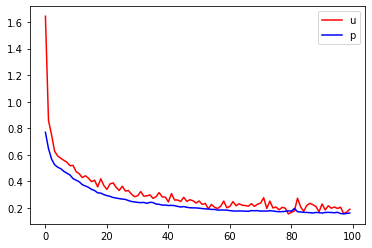

In [219]:
from matplotlib import pyplot as plt
plt.plot(ok.history['loss'], c='r')
plt.plot(ok.history['val_loss'], c='b')
plt.legend('upper right')
plt.show()

In [220]:
model.save('model0.h5')

In [222]:
model.evaluate(x_test,y_test)

103/103 [==============================] - 0s 68us/step


[0.1004815248465075, 0.9708737730979919]

[*zip(np.round(model.predict(x_test)),y_test)]

In [414]:
#kontrol = pd.DataFrame(np.round(model.predict(x_test))==y_test)
kontrol = (np.round(model.predict(x_test))==y_test).mean(axis=1)
uniq, count = np.unique(kontrol, return_counts=True)
print([*zip(uniq,count)])

[(0.0, 3), (1.0, 100)]


In [420]:
count[1] / len(kontrol)

0.970873786407767